#### MPLSTEREONET & MATPLOTLIB PROJECTION

Basically it's same as `matplotlib`. Meaning we can use `mplstereonet.subplots` which is similar to `matplotlib.pyplot.subplots`, but creates stereonet axes. Most of the methods and attributes of `matplotlib` can be used here. 

Similarly, we can use `matplotlib`'s other function like `add_title` etc here too. 

All planar measurements are expected to follow the right-hand-rule to indicate dip direction. As an example, `315/30S` would be `135/30` following the right-hand rule.

Docs: https://mplstereonet.readthedocs.io/en/latest/mplstereonet.html

In [1]:
import matplotlib.pyplot as plt
import mplstereonet as mpl
import warnings

warnings.filterwarnings('ignore')

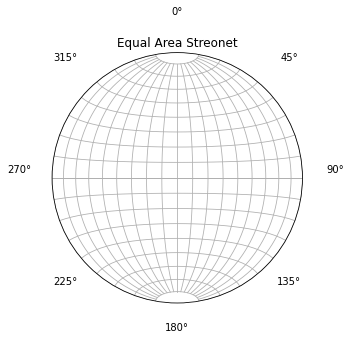

In [2]:
fig, ax = mpl.subplots(projection='equal_area')  # 'equal_area' is default projection
ax.grid()

ax.set_title('Equal Area Streonet')

plt.tight_layout()

Above code can be written as the following too

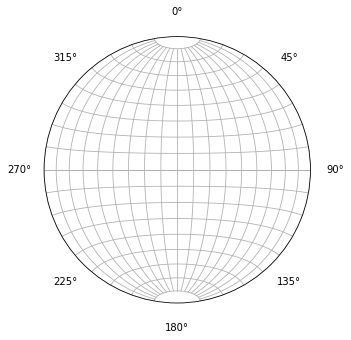

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='stereonet')
ax.grid()
plt.tight_layout()

We can create several stereonet subplots and call them using instances of them or by using indexing method. 

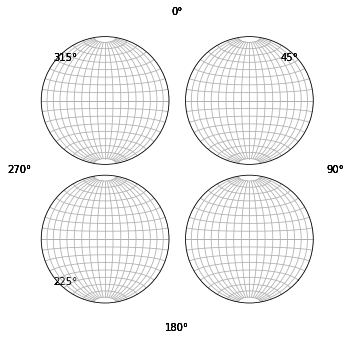

In [4]:
fig, ax = mpl.subplots(2,2,projection='equal_area')

for pr_ax in ax:          #pr_Ax is primary axes
    for sc_ax in pr_ax:   #sc_ax is secondary axes
        sc_ax.grid()
        plt.tight_layout()

In [5]:
# we can see the type of subplot or axes objects
# It is an EqualAreaAxesSubplot stored in an array
ax 

array([[<EqualAreaAxesSubplot:>, <EqualAreaAxesSubplot:>],
       [<EqualAreaAxesSubplot:>, <EqualAreaAxesSubplot:>]], dtype=object)

##### PLOTTING

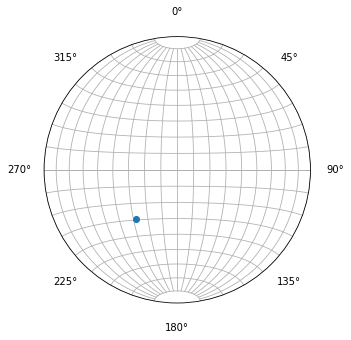

In [6]:
# Plotting a line
fig, ax = mpl.subplots(projection='equal_area')  # 'equal_area' is default projection
ax.grid()

# plotting a line
# kw_args: 'plunge', 'bearing'
# transforming bearing into azimuthal convention
ax.line(50,220)
plt.tight_layout()

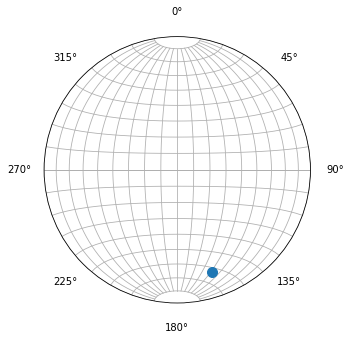

In [7]:
# Plotting a rake 
# kw_args: strike, dip, rake_angle

fig, ax = mpl.subplots(projection='equal_area') 
ax.grid()

ax.rake(120, 29, 45, marker= 'o', markersize= 10)
plt.tight_layout()

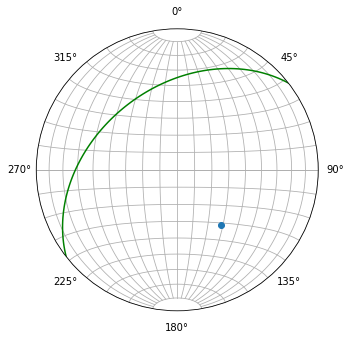

In [8]:
# Plotting a plane and its pole
fig, ax = mpl.subplots(constrained_layout = True)
ax.grid()

# kw_Args: strike, dip(imp)
ax.plane(232, 41.5, color= 'green')

# pole of the plane
# kw_args: strike, dip
ax.pole(232, 41.5)

MPLSTEREONET Example( Plotting Fracture data)

In [9]:
import pandas as pd
temp_df = pd.read_csv('https://raw.githubusercontent.com/ICWallis/fractoolbox/master/testdata-fractures.csv')
temp_df.head(10)

,depth_mMDRF,dipazimuth_deg,dip_deg,type
0,1224.559944,174.87238,78.54814,Cond_FTCC
1,1224.830215,171.09971,71.07558,Cond_FTCC
2,1225.193391,170.17670,70.48370,Cond_FTCC
3,1225.535453,168.36274,69.19910,Cond_FTCC
4,1226.063326,174.29375,72.06275,Cond_FTCC
5,1226.705220,177.07101,70.20312,Cond_FTCC
6,1226.974736,257.05020,79.10287,Cond_FTS
7,1227.267146,256.09820,66.15125,Cond_FTS
8,1227.829188,208.90070,70.01725,Cond_FTS
9,1228.018563,235.11980,60.71380,Cond_FTS


In [10]:
df = temp_df.groupby('type')
df.first()

,depth_mMDRF,dipazimuth_deg,dip_deg
type,,,
Cond_FTCC,1224.559944,174.87238,78.54814
Cond_FTS,1226.974736,257.05020,79.10287
Cond_PTCC,1230.805842,125.58903,62.93477
Cond_PTS,1525.951915,243.13150,69.83575
Cond_PTT,1671.041521,248.11700,80.78706


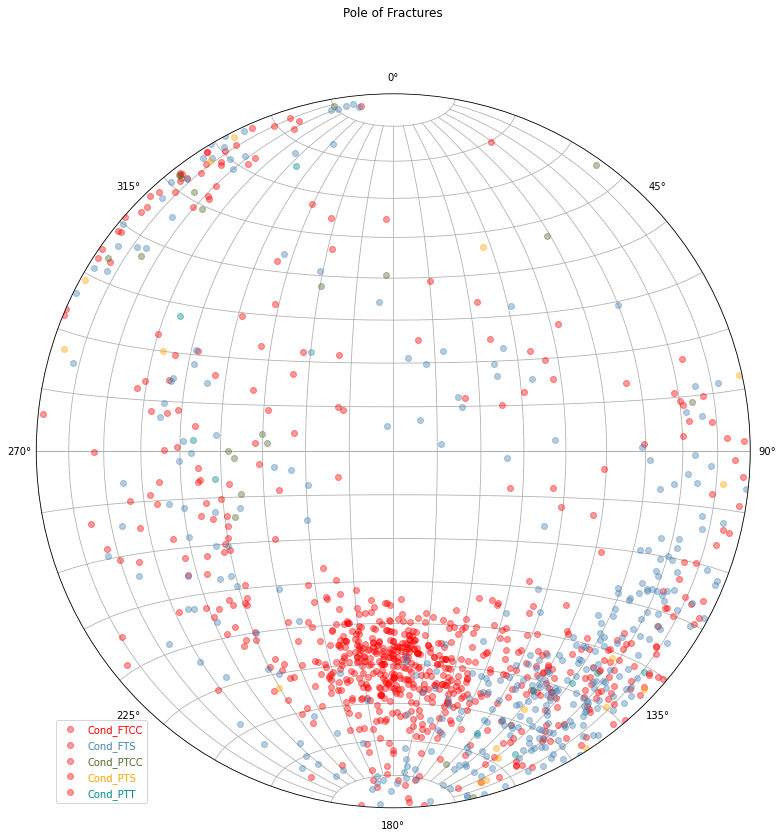

In [29]:
fig, ax = mpl.subplots(constrained_layout= True, figsize= (10,15))
ax.grid()

_list = df.first().index
c = ['red', 'steelblue', 'darkolivegreen', 'orange', 'darkcyan']

for i in range(len(_list)):
    grp_name = _list[i]
    
    fracture_df = df.get_group(grp_name)
    
    for _,row in fracture_df.iterrows():
        ax.pole(row['dipazimuth_deg'], row['dip_deg'], color= c[i], alpha= 0.4)

ax.set_title('Pole of Fractures', y= 1.1)
ax.legend(_list, loc= 'lower left', labelcolor= c, bbox_to_anchor= (0.02,0.0))